### 확인문제

1. 어떤 인공 신경망이 입력특성이 100개 이고 밀집층에 있는 뉴런 개수가 10개일 때 필요한 모델 파라미터 개수는 몇개?
    - 입력 특성의 개수: 100개/ 뉴런의 개수: 10개
    - 총 파라미터 개수 = (100×10)+10 = 1000+10 = 1010
    - 필요한 모델 파라미터의 개수는 1010개.

2. 케라스의 Dense 클래스를 사용해 신경망의 출력층을 만들려고 한다. 이 신경망이 이진 분류 모델이라면 activation 매개변수에 어떤 활성화 함수를 지정해야 하는가?

    - 이진 분류 모델 출력층 활성화 함수: 시그모이드 함수(sigmoid) 
    - 시그모이드 함수는 입력 값을 0과 1 사이의 확률 값으로 변환, 이진 분류 문제에서 각 클래스에 속할 확률을 예측하는데 적합.
    - Dense(1, activation='sigmoid')는 출력층에 1개의 뉴런을 가지고, 활성화 함수로 시그모이드 함수를 사용한다는 의미. 이 신경망은 출력값으로 0과 1 사이의 값을 반환, 이 값은 클래스 1에 속할 확률.

```python
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# 중간층 추가
model.add(Dense(10, input_dim=100, activation='relu'))
# 출력층
model.add(Dense(1, activation='sigmoid'))
```

3. 케라스 모델에서 손실 함수와 측정 지표 등을 지정하는 메서드는 무엇인가?
    - compile 메서드를 사용하여 모델 학습 전에 필요한 설정함. 이 설정에 손실 함수, 옵티마이저, 측정 지표 등이 포함됨.
    - optimizer: 학습 과정을 조정하는 알고리즘. Adam, SGD, RMSprop 등이 있음.
    - loss: 모델이 학습할 때 최소화하려고 하는 손실 함수. 이진 분류에서는 binary_crossentropy를 사용.
    - metrics: 모델의 성능을 평가할 때 사용할 측정 지표. 일반적으로 분류 문제에서는 정확도(accuracy) 사용.
    - 이 방법을 통해 모델의 학습 설정 완료 후 fit 메서드를 사용하여 모델을 학습.
    
```python
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 생성
model = Sequential()
model.add(Dense(10, input_dim=100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(), #optimizer는 Adam 옵티마이저를 사용
              loss='binary_crossentropy', # loss는 이진 분류에 적합한 binary_crossentropy 사용
              metrics=['accuracy']) # metrics에는 모델 성능 평가 - 정확도(accuracy) 사용
```

4. 정수 레이블을 타깃으로 가지는 다중 분류 문제일 때, 케라스 모델의 compile() 메서드에 지정할 손실함수로 적절한 것은 무엇인가?
    - 정수 레이블을 타깃으로 가지는 다중 분류 문제에는 케라스 모델의 compile 메서드에 지정할 손실 함수로 sparse_categorical_crossentropy를 사용하는 것이 적절함. 이 손실 함수는 정수형 레이블을 직접 처리할 수 있으며, 원-핫 인코딩을 사용할 필요가 없음.

```python
# 모델 컴파일
model.compile(optimizer='adam', # optimizer는 Adam 옵티마이저를 사용
              loss='sparse_categorical_crossentropy', # loss는 다중 분류에 적합한 sparse_categorical_crossentropy 사용
              metrics=['accuracy']) # metrics에는 모델 성능평가 - 정확도(accuracy) 사용
```

5. 크기가 $300*300$인 입력을 케라스 층으로 펼치려고 한다. 어떤 층을 사용해야 하는가?
    - 크기가 300×300인 입력을 펼치기 위해서는 Keras의 Flatten 층 사용. 다차원 입력을 1차원으로 펼치는 역할.
    - 300×300 크기의 이미지를 Flatten 층을 통해 펼치면 300 × 300 = 90,000 차원의 1차원 벡터로 변환.
    - 코드: 300×300×3 크기의 컬러 이미지를 입력으로 받아 270,000 (300 * 300 * 3) 차원의 벡터로 펼침. 만약 입력이 흑백 이미지라면 채널 수는 1. 
        - Flatten 층: 다차원 배열을 1차원 벡터로 변환.
        - InputLayer: 모델의 입력 모양 정의. 
        
```python
from keras.models import Sequential
from keras.layers import Flatten

model = Sequential()

# 예를 들어, 입력 크기가 300x300인 입력을 펼치기 위해 InputLayer를 사용할 수 있습니다.
model.add(keras.Input(shape=(300, 300, 3)))  # 컬러 이미지라면 채널이 3 (RGB)이 됩니다.
model.add(Flatten())

# 모델 요약을 출력해서 확인
model.summary()
```

7. 다음 중 적응적 합습률을 사용하지 않는 옵티마이저는 무엇인가?  
    ① SGD        
    ② Adagrad       
    ③ RMSprop       
    ④ Adam
    
=> ① SGD (Stochastic Gradient Descent) 
적응적 학습률(Adaptive learning rate)을 사용하는 옵티마이저는 주어진 학습 데이터와 모델의 상태에 따라 학습률을 조절하여 학습을 최적화하는 방법. 여기에는 Adagrad, RMSprop, Adam 옵티마이저가 포함. SGD는 각각의 매개변수마다 동일한 학습률을 사용하며, 적응적으로 학습률을 조정하지 않음.

1. 케라스 모델의 fit() 메서드에 검증 세트를 올바르게 전달하는 코드는 무엇인가?  

    ④ model.fit(... , validation_data=(val_input, val_target))     

2. 이전 층의 뉴런 출력 중 70%만 사용하기 위해 드롭아웃 층을 추가하려고 한다. 옳게 설정한 것은?
  
    ② Dropout(0.3)  

3. 케라스 모델의 가중치만 저장하는 메서드는 무엇인가?

    ③ save_weights()  

4. 케라스의 조기 종료 콜백을 사용하려고 한다. 3번의 에포크 동안 손실이 감소되지 않으면 종료하고 최상의 모델 가중치를 복원하도록 설정한 것은 무엇인가?
 
    ② EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
    
=> monitor='val_loss': 검증 손실(validation loss)을 모니터링.
patience=3: 손실이 개선되지 않는 에포크 수를 3으로 설정.
restore_best_weights=True: 학습이 중지된 후 가장 좋은 가중치 복원.

[연습]

1. 은닉층을 1개 또는 3개의 층으로 사용하고 검증과 테스트의 정확도 비교해보기

2. 층의 은닉 유닛을 추가하거나 줄여보기
    - 32개 유닛, 64개 유닛 등
3. relu 대신에 tanh 활성화 함수 사용해보기

In [2]:
import numpy as np
from tensorflow import keras
from keras.datasets import imdb

#### 0. 데이터 전처리

In [9]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# IMDb 데이터셋 로드 (단어 빈도 상위 10,000개 단어만 사용)
max_features = 10000
maxlen = 500

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# 데이터 패딩 (모든 시퀀스를 동일한 길이로 맞추기)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# 데이터 분할 (훈련 데이터와 검증 데이터)
from sklearn.model_selection import train_test_split
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

#### 1-1. 은닉층 1개, 32개 유닛, ReLU 활성화 함수

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

def model_1layer_32units():
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

m_1layer_32units = model_1layer_32units()
history_1layer_32units = m_1layer_32units.fit(train_data, train_labels, epochs=20, batch_size=128, validation_data=(val_data, val_labels))

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6159 - loss: 0.6218 - val_accuracy: 0.8480 - val_loss: 0.3375
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9240 - loss: 0.2118 - val_accuracy: 0.8702 - val_loss: 0.3048
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9834 - loss: 0.0755 - val_accuracy: 0.8690 - val_loss: 0.3384
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9974 - loss: 0.0205 - val_accuracy: 0.8634 - val_loss: 0.3896
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9997 - loss: 0.0065 - val_accuracy: 0.8616 - val_loss: 0.4252
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8592 - val_loss: 0.4575
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8616 - val_loss: 0.4688
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.862

#### 1-2. 은닉층 3개, 64개 유닛, ReLU 활성화 함수

In [12]:
def model_3layers_64units():
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

m_3layers_64units = model_3layers_64units()
history_3layers_64units = m_3layers_64units.fit(train_data, train_labels, epochs=20, batch_size=128, validation_data=(val_data, val_labels))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5734 - loss: 0.6452 - val_accuracy: 0.8540 - val_loss: 0.3437
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9269 - loss: 0.1953 - val_accuracy: 0.8732 - val_loss: 0.3136
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9884 - loss: 0.0395 - val_accuracy: 0.8514 - val_loss: 0.5372
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9984 - loss: 0.0073 - val_accuracy: 0.8538 - val_loss: 0.6621
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.8558 - val_loss: 0.7862
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 9.5408e-05 - val_accuracy: 0.8572 - val_loss: 0.8227
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 5.8787e-05 - val_accuracy: 0.8570 - val_loss: 0.8542
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 3.1698e-0

#### 1-3. 은닉층 1개, 32개 유닛, Tanh 활성화 함수

In [13]:
def model_1layer_32units_tanh():
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

m_1layer_32units_tanh = model_1layer_32units_tanh()
history_1layer_32units_tanh = m_1layer_32units_tanh.fit(train_data, train_labels, epochs=20, batch_size=128, validation_data=(val_data, val_labels))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6255 - loss: 0.6151 - val_accuracy: 0.8688 - val_loss: 0.3101
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9408 - loss: 0.1740 - val_accuracy: 0.8676 - val_loss: 0.3101
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9907 - loss: 0.0461 - val_accuracy: 0.8622 - val_loss: 0.3811
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9992 - loss: 0.0095 - val_accuracy: 0.8634 - val_loss: 0.4162
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8634 - val_loss: 0.4401
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8640 - val_loss: 0.4625
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8640 - val_loss: 0.4770
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 7.5730e-04 - val_

#### 2. 정확도

In [15]:
test_loss_1, test_acc_1 = m_1layer_32units.evaluate(test_data, test_labels)
test_loss_2, test_acc_2 = m_3layers_64units.evaluate(test_data, test_labels)
test_loss_3, test_acc_3 = m_1layer_32units_tanh.evaluate(test_data, test_labels)

print(f"Model 1 (1 layer, 32 units, ReLU) Test Accuracy: {test_acc_1}")
print(f"Model 2 (3 layers, 64 units, ReLU) Test Accuracy: {test_acc_2}")
print(f"Model 3 (1 layer, 32 units, Tanh) Test Accuracy: {test_acc_3}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.8653 - loss: 0.6090
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8557 - loss: 1.0494
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.8620 - loss: 0.6038
Model 1 (1 layer, 32 units, ReLU) Test Accuracy: 0.8624799847602844
Model 2 (3 layers, 64 units, ReLU) Test Accuracy: 0.8559600114822388
Model 3 (1 layer, 32 units, Tanh) Test Accuracy: 0.8609600067138672


#### 3. 시각화

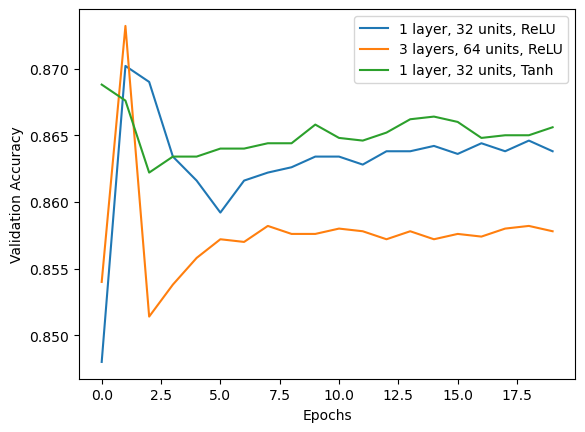

In [14]:
import matplotlib.pyplot as plt

# 모델 1: 은닉층 1개, 32 유닛, ReLU
plt.plot(history_1layer_32units.history['val_accuracy'], label='1 layer, 32 units, ReLU')

# 모델 2: 은닉층 3개, 64 유닛, ReLU
plt.plot(history_3layers_64units.history['val_accuracy'], label='3 layers, 64 units, ReLU')

# 모델 3: 은닉층 1개, 32 유닛, Tanh
plt.plot(history_1layer_32units_tanh.history['val_accuracy'], label='1 layer, 32 units, Tanh')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()